# RMSD

Analyse MD data with MDAnalysis to get the RMSF to the Holo state

In [2]:
import csv
import scipy.stats
import os
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter
import datetime
import gzip
import pathlib
import os
import plotly.graph_objects as go
import kaleido

import matplotlib.pyplot as plt
import numpy
import scipy
from scipy import ndimage

%matplotlib inline

/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/core/universe.py:743: UserWarning: Reader has no dt information, set to 1.

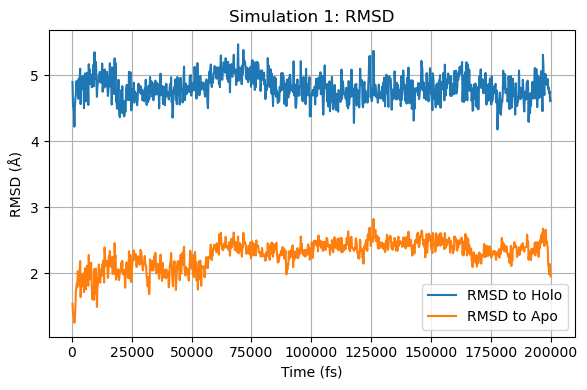

/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "
/home/ubuntu22/miniconda3/envs/md/lib/python3.10/site-packages/MDAnalysis/core/universe.py:743: UserWarning: Reader has no dt information, set to 1.

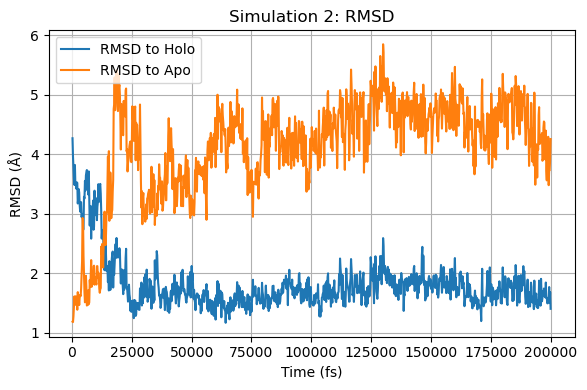

In [49]:
for sim in [1, 2]:
    apo_top = "Simulations/Apo/1anf_malremoved_t3p.parm7"
    apo_dcd = f"Simulations/Apo/simulation_{sim:02d}/npt_production_{sim:02d}.dcd"    
    hol_top = "Simulations/Holo/1anf_mal_t3p.parm7"
    hol_dcd = f"Simulations/Holo/simulation_{sim:02d}/npt_production_{sim:02d}.dcd"

    apo_crystal = f"{os.getcwd()}/Simulations/Apo/1anf_malremoved_tleap.pdb"  # Replace with the actual path to the apo crystal structure
    hol_crystal = f"{os.getcwd()}/Simulations/Holo/1omp.pdb"  # Replace with the actual path to the apo crystal structure

    # Load the apo trajectory
    u = mda.Universe(apo_top, apo_dcd)

    average = align.AverageStructure(u, u, select='protein and name CA',ref_frame=0).run()
    ref = average.results.universe

    # Load the apo crystal structure
    u_crystal_apo = mda.Universe(apo_crystal)

    # Load the holo crystal structure
    u_crystal_hol = mda.Universe(hol_crystal)

    # Align the apo crystal structure to the reference
    align.AlignTraj(u_crystal_apo, ref, select='protein and name CA', in_memory=True).run()

    # Align the holo crystal structure to the reference
    align.AlignTraj(u_crystal_hol, ref, select='protein and name CA', in_memory=True).run()

    # Select the protein atoms in the apo trajectory and the apo crystal structure
    protein_atoms_traj_apo = u.select_atoms('protein and name CA')
    protein_atoms_crystal_apo = u_crystal_apo.select_atoms('protein and name CA')

    # Select the protein atoms in the holo trajectory and the holo crystal structure
    protein_atoms_crystal_hol = u_crystal_hol.select_atoms('protein and name CA')

    # Calculate RMSD for apo
    RMSD_apo = rms.RMSD(protein_atoms_traj_apo, protein_atoms_crystal_apo).run()

    # Calculate RMSD for holo
    RMSD_hol = rms.RMSD(protein_atoms_traj_apo, protein_atoms_crystal_hol).run()

    # Plot RMSD against time for both apo and holo
    plt.figure(figsize=(6, 4))
    plt.plot(RMSD_hol.rmsd[:, 1], RMSD_hol.rmsd[:, 2], label=f'RMSD to Holo')
    plt.plot(RMSD_apo.rmsd[:, 1], RMSD_apo.rmsd[:, 2], label=f'RMSD to Apo')
    plt.xlabel('Time (fs)')
    plt.ylabel('RMSD (Å)')
    plt.title(f'Simulation {sim}: RMSD')
    plt.grid()
    plt.tight_layout()
    plt.legend()
    plt.savefig(f"{os.getcwd()}/Simulations/Apo/simulation_{sim:02d}/RMSD_{sim}.png")
    plt.savefig(f"{os.getcwd()}/Simulations/Apo/simulation_{sim:02d}/RMSD_{sim}.pdf")
    plt.show()

In [ ]:
sim = 1
apo_top = "Simulations/Apo/1anf_malremoved_t3p.parm7"
apo_dcd = f"Simulations/Apo/simulation_{sim:02d}/npt_production_{sim:02d}.dcd"    
hol_top = "Simulations/Holo/1anf_mal_t3p.parm7"
hol_dcd = f"Simulations/Holo/simulation_{sim:02d}/npt_production_{sim:02d}.dcd"

apo_crystal = f"{os.getcwd()}/Simulations/Apo/1anf_malremoved_tleap.pdb"  # Replace with the actual path to the apo crystal structure
hol_crystal = f"{os.getcwd()}/Simulations/Holo/1omp.pdb"  # Replace with the actual path to the apo crystal structure

# Load the apo trajectory
u = mda.Universe(apo_top, apo_dcd)

average = align.AverageStructure(u, u, select='protein and name CA',ref_frame=0).run()
ref = average.results.universe

# Load the apo crystal structure
u_crystal_apo = mda.Universe(apo_crystal)

# Load the holo crystal structure
u_crystal_hol = mda.Universe(hol_crystal)

# Align the apo crystal structure to the reference
align.AlignTraj(u_crystal_apo, ref, select='protein and name CA', in_memory=True).run()

# Align the holo crystal structure to the reference
align.AlignTraj(u_crystal_hol, ref, select='protein and name CA', in_memory=True).run()

# Select the protein atoms in the apo trajectory and the apo crystal structure
protein_atoms_traj_apo = u.select_atoms('protein and name CA')
protein_atoms_crystal_apo = u_crystal_apo.select_atoms('protein and name CA')

# Select the protein atoms in the holo trajectory and the holo crystal structure
protein_atoms_crystal_hol = u_crystal_hol.select_atoms('protein and name CA')

# Calculate RMSD for apo
RMSD_apo = rms.RMSD(protein_atoms_traj_apo, protein_atoms_crystal_apo).run()

# Calculate RMSD for holo
RMSD_hol = rms.RMSD(protein_atoms_traj_apo, protein_atoms_crystal_hol).run()

# Plot RMSD against time for both apo and holo
plt.figure(figsize=(6, 4))
plt.plot(RMSD_hol.rmsd[:, 1], RMSD_hol.rmsd[:, 2], label=f'RMSD to Holo')
plt.plot(RMSD_apo.rmsd[:, 1], RMSD_apo.rmsd[:, 2], label=f'RMSD to Apo')
plt.xlabel('Time (fs)')
plt.ylabel('RMSD (Å)')
plt.title(f'Simulation {sim}: RMSD')
plt.grid()
plt.tight_layout()
plt.legend()
plt.savefig(f"{os.getcwd()}/Simulations/Apo/simulation_{sim:02d}/RMSD_{sim}.png")
plt.savefig(f"{os.getcwd()}/Simulations/Apo/simulation_{sim:02d}/RMSD_{sim}.pdf")
plt.show()


# Get the trajectory up to 75000 fs
u.trajectory[0:75000]

In [106]:
data_chunk = u.trajectory[:100]

uptoIdx: 150
Number of CA atoms: 370
Dim: 1110
All positions are different: False


uptoIdx: 150
Number of CA atoms: 370
Dim: 1110
All positions are different: False
RMSD to Hol: (150,)
Max RMSD to Holo: 4.269307932598844
Min RMSD to Holo: 1.2483692327578004


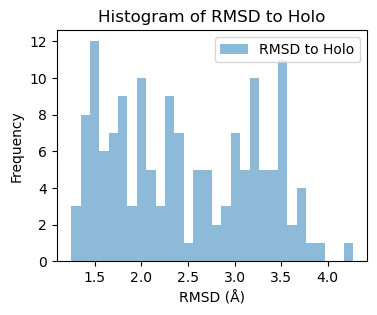

Cluster centers: [1.24836923 2.00360391 2.75883858 3.51407326 4.26930793]
Cluster 1: (np.float64(0.8483692327578004), np.float64(1.6483692327578003)) (28, 370, 3)
Cluster 2: (np.float64(1.6036039077180613), np.float64(2.403603907718061)) (54, 370, 3)
Cluster 3: (np.float64(2.3588385826783225), np.float64(3.1588385826783223)) (35, 370, 3)
Cluster 4: (np.float64(3.1140732576385832), np.float64(3.914073257638583)) (42, 370, 3)
Cluster 5: (np.float64(3.869307932598844), np.float64(4.669307932598844)) (2, 370, 3)
After merging the last two clusters
Cluster 1: 1.25 (28, 370, 3) Mean RMSD to Apo: 36.40
Cluster 2: 2.00 (54, 370, 3) Mean RMSD to Apo: 36.79
Cluster 3: 2.76 (35, 370, 3) Mean RMSD to Apo: 36.48
Cluster 4: 3.51 (44, 370, 3) Mean RMSD to Apo: 37.07
Reversed and Normalised cluster centers: [0.         0.33333333 0.66666667 1.        ]
Cluster 1: 0.00 (44, 370, 3) Mean RMSD to Apo: 37.07
Cluster 2: 0.33 (35, 370, 3) Mean RMSD to Apo: 36.48
Cluster 3: 0.67 (54, 370, 3) Mean RMSD to Apo

In [154]:
uptoIdx = np.ceil(30 / 200 * u.trajectory.n_frames).astype(int)
print(f"uptoIdx: {uptoIdx}")

ca_atoms = u.select_atoms('protein and name CA')
print("Number of CA atoms:", len(ca_atoms))
print(f"Dim: {ca_atoms.n_atoms*3}")

# Extract timeseries data using the `.timeseries()` method
# Shape: (num_frames, num_CA_atoms, 3)
Xtraj = np.empty((uptoIdx, ca_atoms.n_atoms, 3))

# Iterate over the entire trajectory and store Cα positions
for i, ts in enumerate(u.trajectory[:uptoIdx]):
    Xtraj[i] = ca_atoms.positions  # Store positions of Cα atoms
    
# Check if all positions are different
all_positions_different = (np.diff(Xtraj, axis=0) == 0).any()
print(f"All positions are different: {all_positions_different}")



RMSD_hol_values = RMSD_hol.results.rmsd[:uptoIdx, 2]

print("RMSD to Hol:", RMSD_hol_values.shape)
print("Max RMSD to Holo:", np.max(RMSD_hol_values))
print("Min RMSD to Holo:", np.min(RMSD_hol_values))

plt.figure(figsize=(4, 3))
plt.hist(RMSD_hol_values, bins=30, alpha=0.5, label='RMSD to Holo')
plt.xlabel('RMSD (Å)')
plt.ylabel('Frequency')
plt.title('Histogram of RMSD to Holo')
plt.legend()
plt.show()


n_clusters = 5
window_size = 0.8
ts = []  # stores the cluster centers
xs = []
xs_RMSD = []

# Use np.linspace to divide RMSD into n_clusters numbers
cluster_centers = np.linspace(np.min(RMSD_hol_values), np.max(RMSD_hol_values), n_clusters)

print("Cluster centers:", cluster_centers)

for i in range(n_clusters):
    ub = cluster_centers[i] + window_size/2
    lb = cluster_centers[i] - window_size/2
    
    x_ids = np.where((RMSD_hol_values >= lb) & (RMSD_hol_values <= ub))[0]
    
    data = Xtraj[x_ids]
    xs.append(data)
    ts.append(cluster_centers[i])
    xs_RMSD.append(RMSD_hol_values[x_ids])
    print(f"Cluster {i+1}: {(lb, ub)} {data.shape}")
    
# merge the last two clusters
xs[-2] = np.concatenate((xs[-2], xs[-1]))
xs.pop()
xs_RMSD[-2] = np.concatenate((xs_RMSD[-2], xs_RMSD[-1]))
xs_RMSD.pop()
ts.pop()

print("After merging the last two clusters")
for i in range(len(xs)):
    print(f"Cluster {i+1}: {ts[i]:.2f} {xs[i].shape} Mean RMSD to Apo: {np.mean(xs[i]):.2f}")

# we normalise the cluster centers
ts = (ts - np.min(ts)) / (np.max(ts) - np.min(ts))

# we want it to go from close to open, so we reverse the order and reverse the cluster centers
ts = ts[::-1]
ts = 1 - ts
xs = xs[::-1]
xs_RMSD = xs_RMSD[::-1]

print("Reversed and Normalised cluster centers:", ts)
for i in range(len(xs)):
    print(f"Cluster {i+1}: {ts[i]:.2f} {xs[i].shape} Mean RMSD to Apo: {np.mean(xs[i]):.2f}")


num_frames = np.array([len(x) for x in xs]).sum()
percentage = num_frames / uptoIdx * 100
print(f"Using {percentage}% of the data, which is {num_frames} frames")

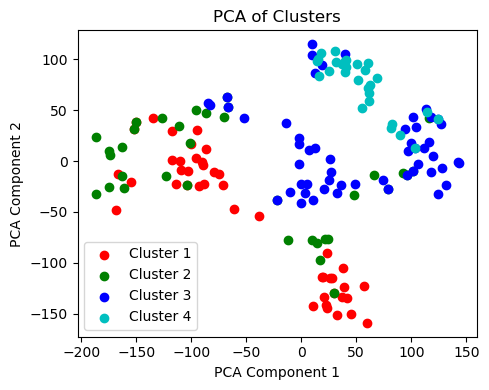

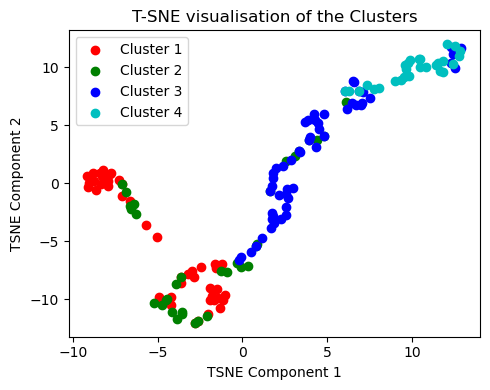

In [155]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Flatten the data for PCA
X_flat = np.concatenate(xs, axis=0).reshape(len(np.concatenate(xs, axis=0)), -1)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flat)

# Assign colors to clusters
colors = ['r', 'g', 'b', 'c']
cluster_labels = np.concatenate([[i] * len(xs[i]) for i in range(len(xs))])

# Plot the PCA results
plt.figure(figsize=(5, 4))
for i in range(len(xs)):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], color=colors[i], label=f'Cluster {i+1}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Clusters')
plt.tight_layout()
plt.legend()
plt.show()


# Perform T-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_flat)

# Plot the T-SNE results
plt.figure(figsize=(5, 4))
for i in range(len(xs)):
    plt.scatter(X_tsne[cluster_labels == i, 0], X_tsne[cluster_labels == i, 1], color=colors[i], label=f'Cluster {i+1}')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('T-SNE visualisation of the Clusters')
plt.tight_layout()
plt.legend()
plt.show()

In [156]:
os.getcwd()

'/home/ubuntu22/Documents/PhD/oshea-j-wood-c-pbp-design-2023'

In [160]:

# save the cluster data

NN_training_dir = f"{os.getcwd()}/../ensembleFolding/exp2_enzyme_preliminary/bin"

# Create directories if they do not exist
os.makedirs(NN_training_dir, exist_ok=True)

for i, x in enumerate(xs):
    np.save(f"{NN_training_dir}/cluster_{i+1}.npy", x)
for i, x in enumerate(xs_RMSD):
    np.save(f"{NN_training_dir}/cluster_RMSD_{i+1}.npy", x)
np.save(f"{NN_training_dir}/cluster_centers.npy", ts)